In [ ]:
# !pip install pandas
# !pip install openpyxl
# !pip install requests
# !pip install tqdm
# !pip install seaborn
# !pip install -U tsfresh
!pip install --upgrade "setuptools<81"


!pip install numpy==1.26.4
!pip install numba




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 3.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for numpy: filename=numpy-1.26.4-cp313-cp313-macosx_15_0_arm64.whl size=4680105 sha256=5f735fd15e2234bebac36d149564e7be579abb5b54011e15225b430d2e97144c
  Stored in directory: /Users/rokerius/Library/Caches/pip/wheels/8b/2d/9f/b6b46373f328e2ef50388915d351ccacbedac929459b5459bf
Successfully built numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tsfresh.utilities.dataframe_functions import impute

from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute

from main import create_new_weather_columns


# Создание df

In [3]:
RANDOM_STATE = 239

df = pd.read_excel("target.xlsx", sheet_name="data cleaned")

In [4]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['state'])
df_encoded.head(2)

,start_date,year,month,nps,state_Алтайский край,state_Амурская область,state_Архангельская область,state_Астраханская область,state_Брянская область,state_Владимирская область,...,state_Томская область,state_Тульская область,state_Тюменская область,state_Ульяновская область,state_Хабаровский край,state_Ханты-Мансийский автономный округ - Югра,state_Челябинская область,state_Чеченская Республика,state_Чувашская Республика - Чувашия,state_Ярославская область
0,2024-10-01,2024,10,8,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2024-10-01,2024,10,10,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df_weather = create_new_weather_columns(df, cache_path='../cache/weather_cache.pkl')

Cache file '../cache/weather_cache.pkl' успешно загружен.


Processing rows: 100%|██████████| 71500/71500 [00:01<00:00, 55274.66it/s]


Cache saved to ../cache/weather_cache.pkl


In [6]:
df_weather

,start_date,year,month,nps,state,temp_max_avg,temp_min_avg,precipitation_sum,wind_speed_max_avg,humidity_max_avg,humidity_mean_avg,cloudcover_avg,solar_radiation_sum,snowfall_sum,days_clear,days_cloudy,days_rain_drizzle,days_snow
0,2024-10-01,2024,10,8,Алтайский край,10.759016,2.393443,1.714754,18.355738,90.852459,73.590164,63.819672,9.105902,0.200820,2,24,27,8
1,2024-10-01,2024,10,10,Алтайский край,10.759016,2.393443,1.714754,18.355738,90.852459,73.590164,63.819672,9.105902,0.200820,2,24,27,8
2,2024-10-01,2024,10,10,Алтайский край,10.759016,2.393443,1.714754,18.355738,90.852459,73.590164,63.819672,9.105902,0.200820,2,24,27,8
3,2024-10-01,2024,10,10,Алтайский край,10.759016,2.393443,1.714754,18.355738,90.852459,73.590164,63.819672,9.105902,0.200820,2,24,27,8
4,2024-10-01,2024,10,10,Алтайский край,10.759016,2.393443,1.714754,18.355738,90.852459,73.590164,63.819672,9.105902,0.200820,2,24,27,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71495,2024-04-01,2024,4,10,Ярославская область,8.260656,-1.549180,0.993443,19.009836,89.786885,76.000000,69.081967,12.012131,0.055082,0,35,20,6
71496,2024-04-01,2024,4,3,Ярославская область,8.260656,-1.549180,0.993443,19.009836,89.786885,76.000000,69.081967,12.012131,0.055082,0,35,20,6
71497,2024-04-01,2024,4,0,Ярославская область,8.260656,-1.549180,0.993443,19.009836,89.786885,76.000000,69.081967,12.012131,0.055082,0,35,20,6
71498,2024-04-01,2024,4,5,Ярославская область,8.260656,-1.549180,0.993443,19.009836,89.786885,76.000000,69.081967,12.012131,0.055082,0,35,20,6


# Смотрим на df

In [7]:
df_weather.describe()

,start_date,year,month,nps,temp_max_avg,temp_min_avg,precipitation_sum,wind_speed_max_avg,humidity_max_avg,humidity_mean_avg,cloudcover_avg,solar_radiation_sum,snowfall_sum,days_clear,days_cloudy,days_rain_drizzle,days_snow
count,71500,71500.000000,71500.000000,71500.000000,71500.000000,71500.000000,71500.000000,71500.000000,71500.000000,71500.000000,71500.000000,71500.000000,71500.000000,71500.000000,71500.000000,71500.000000,71500.000000
mean,2024-07-01 14:46:09.230769408,2024.076923,6.076923,6.367552,9.144042,0.766851,1.538782,17.778088,88.478769,73.898674,65.887699,11.178406,0.303952,1.867133,27.786014,17.881119,13.542657
min,2024-01-01 00:00:00,2024.000000,1.000000,0.000000,-33.077419,-39.754839,0.035484,6.517742,60.901639,37.096774,26.096774,0.026774,0.000000,0.000000,8.000000,0.000000,0.000000
25%,2024-04-01 00:00:00,2024.000000,3.000000,2.000000,-1.056452,-6.979032,0.958333,16.175410,86.278689,67.934426,53.147541,4.145246,0.000000,0.000000,22.000000,5.000000,0.000000
50%,2024-07-01 00:00:00,2024.000000,6.000000,9.000000,9.008197,1.221311,1.414754,18.045902,89.557377,75.516129,65.163934,10.253115,0.136557,1.000000,27.000000,18.000000,9.000000
75%,2024-10-01 00:00:00,2024.000000,9.000000,10.000000,20.462295,10.319672,1.963934,19.631148,92.116667,81.327869,79.327869,17.951639,0.534333,3.000000,33.000000,28.000000,25.000000
max,2025-01-01 00:00:00,2025.000000,12.000000,10.000000,34.100000,22.772581,5.727419,28.337097,97.475410,91.741935,97.145161,25.711967,1.669839,15.000000,54.000000,53.000000,52.000000
std,NaN,0.266471,3.626033,4.146189,12.611798,11.566313,0.838898,3.245635,5.446092,9.998900,16.417684,7.431308,0.366274,2.382463,7.709122,13.429156,14.077678


In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71500 entries, 0 to 71499
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   start_date           71500 non-null  datetime64[ns]
 1   year                 71500 non-null  int64         
 2   month                71500 non-null  int64         
 3   nps                  71500 non-null  int64         
 4   state                71500 non-null  object        
 5   temp_max_avg         71500 non-null  float64       
 6   temp_min_avg         71500 non-null  float64       
 7   precipitation_sum    71500 non-null  float64       
 8   wind_speed_max_avg   71500 non-null  float64       
 9   humidity_max_avg     71500 non-null  float64       
 10  humidity_mean_avg    71500 non-null  float64       
 11  cloudcover_avg       71500 non-null  float64       
 12  solar_radiation_sum  71500 non-null  float64       
 13  snowfall_sum         71500 non-

In [9]:
df_weather_lin = df_weather.drop(['state', 'start_date'], axis=1)
df_weather_lin.corr()


,year,month,nps,temp_max_avg,temp_min_avg,precipitation_sum,wind_speed_max_avg,humidity_max_avg,humidity_mean_avg,cloudcover_avg,solar_radiation_sum,snowfall_sum,days_clear,days_cloudy,days_rain_drizzle,days_snow
year,1.000000,-0.404186,-0.029781,-0.278995,-0.228607,-0.140012,-0.102391,0.082065,0.278249,0.309662,-0.340161,0.237608,-0.107271,-0.053263,-0.269080,0.322934
month,-0.404186,1.000000,-0.031121,0.446022,0.495262,0.166667,-0.147205,0.095639,-0.153525,-0.270446,0.175334,-0.361487,0.161948,0.000639,0.412238,-0.422628
nps,-0.029781,-0.031121,1.000000,-0.008552,-0.015321,0.001458,0.005575,-0.019279,-0.018311,-0.012391,0.022407,-0.005054,-0.005502,0.004402,-0.003797,0.002206
temp_max_avg,-0.278995,0.446022,-0.008552,1.000000,0.984265,0.392365,-0.086008,-0.045873,-0.600185,-0.683103,0.860402,-0.718187,0.269572,-0.021617,0.839720,-0.828782
temp_min_avg,-0.228607,0.495262,-0.015321,0.984265,1.000000,0.440644,-0.059884,0.041600,-0.492549,-0.593911,0.781669,-0.664494,0.225799,-0.100158,0.843268,-0.779795
precipitation_sum,-0.140012,0.166667,0.001458,0.392365,0.440644,1.000000,0.032025,0.478405,0.187314,0.039416,0.288112,-0.036124,-0.295898,-0.630129,0.632754,-0.200706
wind_speed_max_avg,-0.102391,-0.147205,0.005575,-0.086008,-0.059884,0.032025,1.000000,-0.164442,0.007870,0.167691,-0.072134,0.259784,-0.012164,-0.204184,-0.133362,0.235846
humidity_max_avg,0.082065,0.095639,-0.019279,-0.045873,0.041600,0.478405,-0.164442,1.000000,0.766653,0.442661,-0.241636,0.177225,-0.518044,-0.487393,0.244949,0.123577
humidity_mean_avg,0.278249,-0.153525,-0.018311,-0.600185,-0.492549,0.187314,0.007870,0.766653,1.000000,0.802208,-0.743579,0.621240,-0.537976,-0.427940,-0.318608,0.630295
cloudcover_avg,0.309662,-0.270446,-0.012391,-0.683103,-0.593911,0.039416,0.167691,0.442661,0.802208,1.000000,-0.789113,0.759790,-0.632032,-0.431600,-0.495183,0.815558


# Что-то делаем с df

### Объединяем отзывы с одного места в одно время (теперь дубликатов не будет) 

In [ ]:
df_weather_grouped = df_weather.groupby(['start_date', 'year', 'month', 'state'], as_index=False)['nps'].mean()
df_weather_grouped = create_new_weather_columns(df_weather_grouped, cache_path='../cache/weather_cache.pkl')

df_weather_grouped['start_date'] = df_weather_grouped['start_date'].astype('int64') // 10**9
df_weather_grouped_encoded = pd.get_dummies(df_weather_grouped, columns=['state']) # One-Hot Encoding


df_weather_grouped_encoded

Cache file '../cache/weather_cache.pkl' успешно загружен.


Processing rows: 100%|██████████| 715/715 [00:00<00:00, 45098.69it/s]

Cache saved to ../cache/weather_cache.pkl


,start_date,year,month,nps,temp_max_avg,temp_min_avg,precipitation_sum,wind_speed_max_avg,humidity_max_avg,humidity_mean_avg,...,state_Томская область,state_Тульская область,state_Тюменская область,state_Ульяновская область,state_Хабаровский край,state_Ханты-Мансийский автономный округ - Югра,state_Челябинская область,state_Чеченская Республика,state_Чувашская Республика - Чувашия,state_Ярославская область
0,1704067200,2024,1,7.23,-9.746774,-18.648387,1.403226,19.575806,85.241935,78.887097,...,False,False,False,False,False,False,False,False,False,False
1,1704067200,2024,1,7.57,-17.074194,-25.019355,0.229032,13.912903,79.112903,71.145161,...,False,False,False,False,False,False,False,False,False,False
2,1704067200,2024,1,6.71,-8.009677,-13.638710,1.096774,14.851613,89.548387,85.419355,...,False,False,False,False,False,False,False,False,False,False
3,1704067200,2024,1,7.58,2.395161,-3.785484,0.929032,21.709677,91.435484,80.774194,...,False,False,False,False,False,False,False,False,False,False
4,1704067200,2024,1,5.56,-3.474194,-9.125806,2.196774,22.529032,92.645161,88.983871,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,1735689600,2025,1,5.56,-7.646774,-14.003226,1.375806,20.982258,88.887097,85.387097,...,False,False,False,False,False,True,False,False,False,False
711,1735689600,2025,1,5.12,-4.827419,-10.408065,0.853226,17.864516,87.967742,83.241935,...,False,False,False,False,False,False,True,False,False,False
712,1735689600,2025,1,5.48,5.925806,-0.285484,0.974194,11.177419,95.548387,85.435484,...,False,False,False,False,False,False,False,True,False,False
713,1735689600,2025,1,5.25,-2.211290,-6.120968,1.322581,18.637097,93.177419,89.741935,...,False,False,False,False,False,False,False,False,True,False


Записей стало в 100 раз меньше

# ML

In [11]:
X = df_weather_grouped_encoded.drop('nps', axis=1)
y = df_weather_grouped_encoded['nps']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)


model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.34973452440559444


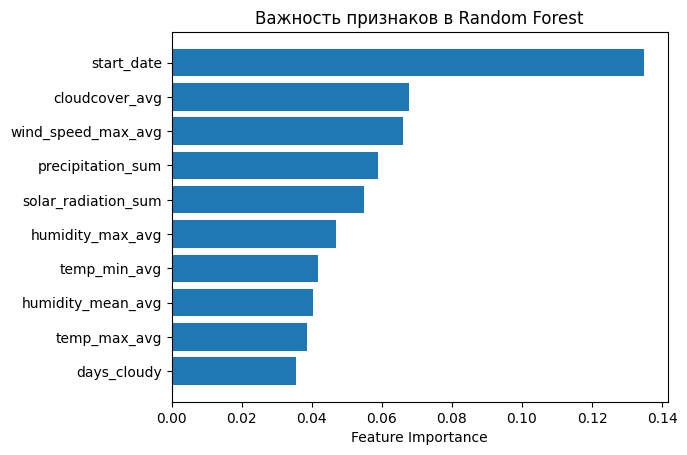

In [ ]:
importances = model.feature_importances_

feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=True)

plt.barh(feature_importances['feature'][-10:], feature_importances['importance'][-10:])
plt.xlabel('Feature Importance')
plt.title('Важность признаков в Random Forest')
plt.show()

### tsfresh 1

In [24]:
df_tsfresh = df.rename(columns={'state': 'id', 'nps': 'value'})

# Оставим только нужные колонки
df_tsfresh = df_tsfresh[['id', 'start_date', 'value']]

# Извлечение признаков
features = extract_features(df_tsfresh, column_id='id', column_sort='start_date')

# Обработка пропущенных значений
impute(features)

features.head()

Feature Extraction:   0%|          | 0/19 [00:00<?, ?it/s]/Users/rokerius/VSCodeProjects/CU_TL_Megafon_2/CU_TL_Megafon_NPS/.venv/lib/python3.13/site-packages/tsfresh/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/rokerius/VSCodeProjects/CU_TL_Megafon_2/CU_TL_Megafon_NPS/.venv/lib/python3.13/site-packages/tsfresh/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/rokerius/VSCodeProjects/CU_TL_Megafon_2/CU_TL_Megafon_NPS/.venv/lib/python3.13/site-packages/tsfresh/__init__.py:12: UserWarning: pkg_resources is deprecated

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
Алтайский край,1.0,1.0,1.0,1.0,9336.0,86518.0,3.847575,0.000000,0.000000,10.0,...,1.161386,1.799870,3.798614,1.583242,2.665424,3.800892,4.879808,5.779180,0.0,10.0
Амурская область,1.0,1.0,1.0,1.0,9051.0,83685.0,4.033872,-0.001540,-0.000770,10.0,...,1.515421,2.130045,4.013404,1.600566,2.708577,3.878730,4.970301,5.851181,0.0,10.0
Архангельская область,1.0,1.0,1.0,1.0,7793.0,68901.0,4.493457,0.003849,-0.002696,8.0,...,1.302537,1.939926,3.932825,1.705764,2.958582,4.318594,5.586896,6.487434,0.0,10.0
Астраханская область,1.0,1.0,1.0,1.0,8730.0,80746.0,4.317937,-0.002309,-0.002696,10.0,...,1.330326,1.979239,3.936547,1.617992,2.728366,3.905265,5.023483,5.929122,0.0,10.0
Брянская область,1.0,1.0,1.0,1.0,7553.0,67837.0,4.651270,0.000000,-0.005778,8.0,...,1.438120,2.124609,4.027445,1.677701,2.902703,4.235883,5.465011,6.362459,0.0,10.0


In [27]:
y = df.groupby('state')['nps'].mean()
y = y.reindex(features.index)

selected_features = select_features(features, y)
selected_features.head()

/Users/rokerius/VSCodeProjects/CU_TL_Megafon_2/CU_TL_Megafon_NPS/.venv/lib/python3.13/site-packages/tsfresh/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/rokerius/VSCodeProjects/CU_TL_Megafon_2/CU_TL_Megafon_NPS/.venv/lib/python3.13/site-packages/tsfresh/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/rokerius/VSCodeProjects/CU_TL_Megafon_2/CU_TL_Megafon_NPS/.venv/lib/python3.13/site-packages/tsfresh/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_r

,value__sum_values,value__sum_of_reoccurring_data_points,value__mean,"value__fft_coefficient__attr_""abs""__coeff_0","value__fft_coefficient__attr_""real""__coeff_0",value__skewness,value__c3__lag_1,value__abs_energy,value__root_mean_square,value__c3__lag_3,...,"value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","value__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""","value__fft_aggregated__aggtype_""variance""","value__cwt_coefficients__coeff_14__w_20__widths_(2, 5, 10, 20)",value__symmetry_looking__r_0.25,value__longest_strike_above_mean,"value__cwt_coefficients__coeff_13__w_20__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_12__w_20__widths_(2, 5, 10, 20)","value__fft_coefficient__attr_""angle""__coeff_28","value__fft_coefficient__attr_""abs""__coeff_81"
Алтайский край,9336.0,9336.0,7.181538,9336.0,9336.0,-0.972304,373.966872,86518.0,8.157960,357.439722,...,4.908649,0.002859,41692.914866,21.503523,0.0,12.0,21.201988,20.837695,-144.921838,27.133735
Амурская область,9051.0,9051.0,6.962308,9051.0,9051.0,-0.869276,335.843606,83685.0,8.023283,338.430448,...,7.164908,0.002813,40471.204521,15.630185,0.0,22.0,16.704668,14.960679,111.085482,158.858176
Архангельская область,7793.0,7793.0,5.994615,7793.0,7793.0,-0.422004,214.594761,68901.0,7.280163,219.421175,...,8.661301,0.002954,39628.874495,9.269913,1.0,9.0,9.129175,9.342827,109.846627,46.715323
Астраханская область,8730.0,8730.0,6.715385,8730.0,8730.0,-0.740640,298.453005,80746.0,7.881136,302.581144,...,15.952034,0.002982,41461.835190,19.670957,0.0,12.0,19.545839,18.100305,66.102239,121.043724
Брянская область,7553.0,7553.0,5.810000,7553.0,7553.0,-0.332232,201.248074,67837.0,7.223732,209.498454,...,15.180158,0.003508,40477.232890,13.242319,1.0,9.0,12.987373,11.037096,63.267857,125.953173


In [34]:
def add_tsfresh_features(df, id_col='state', time_col='start_date', value_col='nps'):
    """
    Возвращает:
    - df_features: DataFrame с признаками tsfresh, индекс — id_col (уникальные регионы)
    - df_merged: исходный df, расширенный агрегированными признаками по регионам
    """
    df_tsfresh = df[[id_col, time_col, value_col]].copy()
    df_tsfresh[time_col] = pd.to_datetime(df_tsfresh[time_col])
    df_tsfresh[time_col] = df_tsfresh[time_col].astype(int) // 10**9

    features = extract_features(df_tsfresh, column_id=id_col, column_sort=time_col)

    impute(features)
    agg_df = df.groupby(id_col).last().drop(columns=[time_col, value_col], errors='ignore')
    df_merged = agg_df.join(features, how='left')

    return features, df_merged


features, df_with_features = add_tsfresh_features(df_weather)
df_with_features

Feature Extraction:   0%|          | 0/19 [00:00<?, ?it/s]/Users/rokerius/VSCodeProjects/CU_TL_Megafon_2/CU_TL_Megafon_NPS/.venv/lib/python3.13/site-packages/tsfresh/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/rokerius/VSCodeProjects/CU_TL_Megafon_2/CU_TL_Megafon_NPS/.venv/lib/python3.13/site-packages/tsfresh/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/rokerius/VSCodeProjects/CU_TL_Megafon_2/CU_TL_Megafon_NPS/.venv/lib/python3.13/site-packages/tsfresh/__init__.py:12: UserWarning: pkg_resources is deprecated

,year,month,temp_max_avg,temp_min_avg,precipitation_sum,wind_speed_max_avg,humidity_max_avg,humidity_mean_avg,cloudcover_avg,solar_radiation_sum,...,nps__fourier_entropy__bins_5,nps__fourier_entropy__bins_10,nps__fourier_entropy__bins_100,nps__permutation_entropy__dimension_3__tau_1,nps__permutation_entropy__dimension_4__tau_1,nps__permutation_entropy__dimension_5__tau_1,nps__permutation_entropy__dimension_6__tau_1,nps__permutation_entropy__dimension_7__tau_1,nps__query_similarity_count__query_None__threshold_0.0,nps__mean_n_absolute_max__number_of_maxima_7
state,,,,,,,,,,,,,,,,,,,,,
Алтайский край,2024,11,3.034426,-4.286885,1.539344,18.580328,89.967213,77.426230,73.081967,5.138689,...,1.161386,1.799870,3.798614,1.583242,2.665424,3.800892,4.879808,5.779180,0.0,10.0
Амурская область,2025,1,-16.569355,-25.300000,0.233871,13.966129,81.516129,74.758065,50.274194,4.476613,...,1.515421,2.130045,4.013404,1.600566,2.708577,3.878730,4.970301,5.851181,0.0,10.0
Архангельская область,2025,1,-3.724194,-8.535484,2.085484,19.672581,92.290323,87.677419,90.935484,0.258548,...,1.302537,1.939926,3.932825,1.705764,2.958582,4.318594,5.586896,6.487434,0.0,10.0
Астраханская область,2024,12,4.680328,0.091803,1.118033,17.170492,92.147541,81.540984,82.049180,3.685902,...,1.330326,1.979239,3.936547,1.617992,2.728366,3.905265,5.023483,5.929122,0.0,10.0
Брянская область,2025,1,0.788710,-2.708065,0.983871,16.469355,95.064516,90.064516,94.161290,1.626290,...,1.438120,2.124609,4.027445,1.677701,2.902703,4.235883,5.465011,6.362459,0.0,10.0
Владимирская область,2024,5,15.086885,4.473770,1.280328,20.057377,86.311475,65.836066,57.704918,18.153443,...,1.304424,1.950567,3.909249,1.725981,3.007204,4.381125,5.639647,6.511872,0.0,10.0
Волгоградская область,2024,3,3.230000,-4.898333,0.915000,17.503333,89.116667,76.933333,63.933333,10.531167,...,1.212957,1.835711,3.797728,1.605598,2.738392,3.901620,5.011304,5.893296,0.0,10.0
Вологодская область,2024,8,22.524194,13.374194,2.085484,14.104839,94.306452,76.370968,50.419355,19.122581,...,1.374393,2.016398,3.804854,1.706292,2.954240,4.285593,5.529958,6.436310,0.0,10.0
Воронежская область,2025,1,1.116129,-2.533871,0.991935,16.667742,91.322581,83.935484,91.741935,1.975323,...,1.286339,1.874720,3.805979,1.703238,2.945613,4.274031,5.511823,6.423266,0.0,10.0


### tsfresh2

In [ ]:
df_weather['id'] = df_weather['state'] + '_' + df_weather['year'].astype(str) + '_' + df_weather['month'].astype(str)

features_to_extract = [
    'temp_max_avg', 'temp_min_avg', 'precipitation_sum', 'wind_speed_max_avg',
    'humidity_max_avg', 'humidity_mean_avg', 'cloudcover_avg', 'solar_radiation_sum',
    'snowfall_sum', 'days_clear', 'days_cloudy', 'days_rain_drizzle', 'days_snow'
]

df_long = pd.melt(
    df,
    id_vars=['id', 'start_date'],
    value_vars=features_to_extract,
    var_name='kind',
    value_name='value'
).rename(columns={'start_date': 'time'})

extracted_features = extract_features(
    df_long,
    column_id='id',
    column_sort='time',
    column_kind='kind',
    column_value='value',
    impute_function=impute,
    show_warnings=False
)


y = df.groupby(['state', 'year', 'month'])['nps'].mean()
y = y.reindex(extracted_features.index)

selected_features = select_features(extracted_features, y['target'])